In [ ]:
#References:
#https://arxiv.org/pdf/1808.08317.pdf - To Cluster, or Not to Cluster

In [1]:
 !pip install pyclustertend

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pyclustertend import vat, ivat,hopkins
from sklearn.preprocessing import normalize

df =pd.read_csv("../../data/combined_csv_missingval_mean.csv",encoding='iso-8859-1')

In [96]:
X = df[df.columns[~df.columns.isin(["STATE","LOCATIONS","STATION CODE"])]]

In [97]:
X = normalize(X)

In [98]:
Xd=pd.DataFrame(X)

In [99]:
Xd

0         1         2             3             4             5   \
0     0.000004  0.000004  0.000004  8.815703e-07  1.334849e-06  1.104357e-06   
1     0.000004  0.000004  0.000004  8.815703e-07  1.334849e-06  1.104357e-06   
2     0.000003  0.000003  0.000003  8.815703e-07  1.334849e-06  1.104357e-06   
3     0.000005  0.000005  0.000005  8.815704e-07  1.334849e-06  1.104357e-06   
4     0.009018  0.010220  0.009519  1.750760e-03  2.650951e-03  2.193204e-03   
5     0.004095  0.005309  0.004490  7.950765e-04  1.203882e-03  9.960047e-04   
6     0.013337  0.018277  0.014424  2.589419e-03  3.920825e-03  3.243806e-03   
7     0.016515  0.024161  0.019023  3.206377e-03  4.855005e-03  4.016678e-03   
8     0.008044  0.008044  0.008044  1.686756e-03  2.554039e-03  2.113026e-03   
9     0.013646  0.015829  0.014192  2.861292e-03  4.332488e-03  3.584386e-03   
10    0.044730  0.044730  0.044730  8.684309e-03  1.314954e-02  1.087897e-02   
11    0.007883  0.007883  0.007883  1.589353e-03  2.406553e-03  1.991007e-03   
12    0.005807  0.005807  0.005807  9.513081e-04  1.440444e-03  1.191718e-03   
13    0.011044  0.011044  0.011044  2.067618e-03  3.130728e-03  2.590137e-03   
14    0.004175  0.004175  0.004175  7.546812e-04  1.142717e-03  9.454009e-04   
15    0.000004  0.000004  0.000004  8.815703e-07  1.334849e-06  1.104357e-06   
16    0.000003  0.000003  0.000003  8.815703e-07  1.334849e-06  1.104357e-06   
17    0.004891  0.004891  0.004891  1.025523e-03  1.552818e-03  1.284689e-03   
18    0.004502  0.004502  0.004502  9.077414e-04  1.374476e-03  1.137142e-03   
19    0.005534  0.005534  0.005534  1.160318e-03  1.756920e-03  1.453548e-03   
20    0.015701  0.015701  0.015701  3.292083e-03  4.984780e-03  4.124044e-03   
21    0.006886  0.006886  0.006886  1.443775e-03  2.186124e-03  1.808640e-03   
22    0.000000  0.000000  0.000000  2.859520e-07  4.329804e-07  3.582165e-07   
23    0.000000  0.000000  0.000000  2.859520e-07  4.329804e-07  3.582165e-07   
24    0.000000  0.000000  0.000000  2.859520e-07  4.329804e-07  3.582165e-07   
25    0.000000  0.000000  0.000000  2.859520e-07  4.329804e-07  3.582165e-07   
26    0.000000  0.000000  0.000000  2.859520e-07  4.329804e-07  3.582165e-07   
27    0.000000  0.000000  0.000000  2.859520e-07  4.329804e-07  3.582165e-07   
28    0.000004  0.000004  0.000004  8.815703e-07  1.334849e-06  1.104357e-06   
29    0.034731  0.034731  0.034731  6.068708e-03  9.189066e-03  7.602364e-03   
...        ...       ...       ...           ...           ...           ...   
1583  0.000067  0.000123  0.000095  2.384779e-05  2.943711e-05  2.645614e-05   
1584  0.000152  0.000254  0.000218  4.900767e-05  6.038445e-05  5.513363e-05   
1585  0.014921  0.022382  0.019995  4.998645e-03  6.639991e-03  6.117744e-03   
1586  0.023991  0.037881  0.033209  9.470304e-03  1.123809e-02  1.048047e-02   
1587  0.002888  0.005415  0.004657  1.263560e-03  1.606526e-03  1.389916e-03   
1588  0.000184  0.000280  0.000227  5.248210e-05  8.134725e-05  6.297852e-05   
1589  0.000085  0.000141  0.000112  0.000000e+00  4.014488e-05  1.932902e-05   
1590  0.002149  0.003172  0.002763  8.596297e-04  1.719259e-03  1.330379e-03   
1591  0.000084  0.000116  0.000101  1.395540e-05  4.385983e-05  3.110060e-05   
1592  0.000270  0.000598  0.000469  1.928597e-05  5.785790e-04  1.986454e-04   
1593  0.000086  0.000128  0.000112  2.918320e-05  4.280203e-05  3.540896e-05   
1594  0.002422  0.003835  0.003108  5.449265e-04  8.779371e-04  7.265687e-04   
1595  0.001740  0.002648  0.002232  4.540270e-04  9.156211e-04  6.886076e-04   
1596  0.018674  0.033417  0.028601  4.815985e-03  6.388552e-03  5.602269e-03   
1597  0.000684  0.001011  0.000862  1.555367e-04  1.866441e-04  1.710904e-04   
1598  0.010868  0.015829  0.013467  2.220842e-03  2.835117e-03  2.598857e-03   
1599  0.000039  0.000074  0.000057  2.159643e-05  2.383054e-05  2.234113e-05   
1600  0.000155  0.000259  0.000215  4.567857e-05  5.860647e-05  5.257345e-05   
1601  0.0004

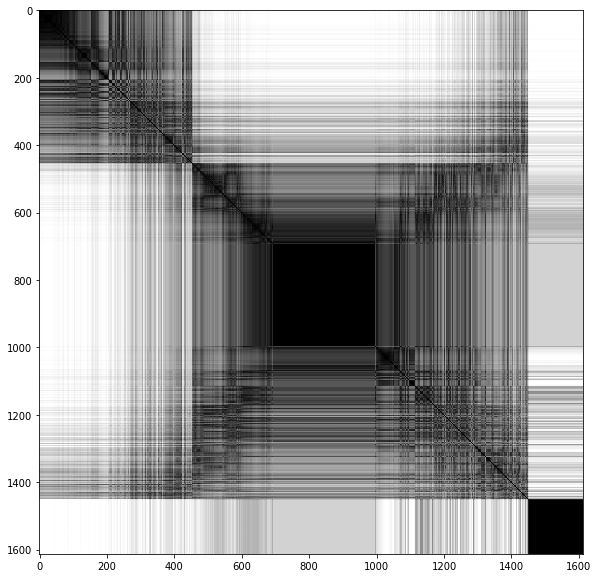

In [15]:
vat(X)

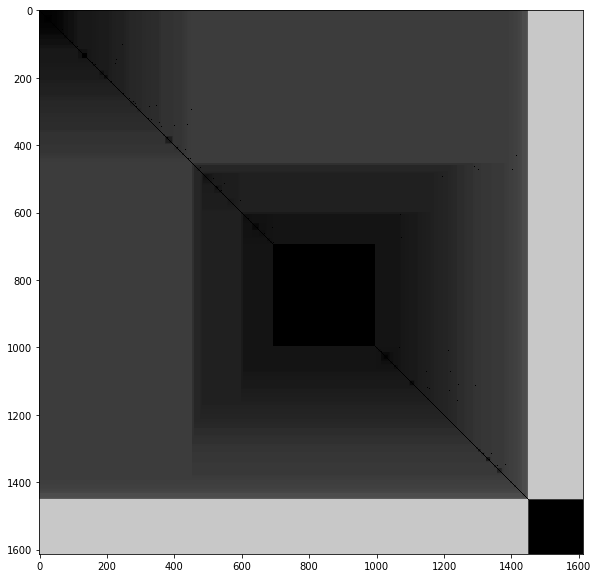

In [16]:
ivat(X)

In [28]:
hopkins(X,100)#hopkins from pyclusterend close to 0-> high clusterability

0.06997559549401794

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkinss(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

X = df[df.columns[~df.columns.isin(["STATE","LOCATIONS","STATION CODE"])]]

In [36]:
hopkinss(X)#clustering close to 1 implies high clusterabality

0.9999955188802521

# Plotting pairwise distances to analyze clusterability

In [102]:
import math
def euclideandist(a,b):
    return math.sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

dist=[]#compute a pairwise dissimilarity between each set of points
for i in range(1 , Xd.shape[0]):
    for j in range(i+1 , Xd.shape[0]):
        dist.append((euclideandist(Xd.iloc[i],Xd.iloc[j])))

# The below plot indicates that  pairwise dissimilarities(distances) of points from the distribution has a few spikes indicating the possiblity of different clusters. These spikes in the histogram might be indicative of  intercluster distances

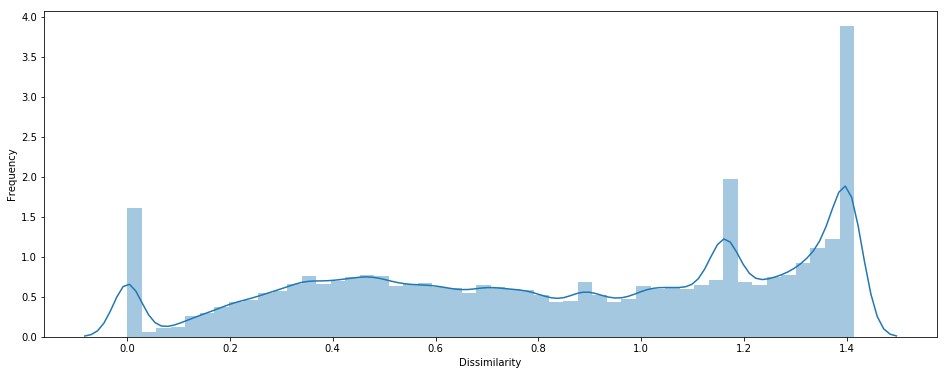

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
ax = sns.distplot(dist)
ax=ax.set(xlabel="Dissimilarity", ylabel = "Frequency")

# PCA based visual assesment of clusterability. We use dimensionality reduction to evalutate clusterablity 

In [1]:
import pandas as pd
import seaborn as sns

wq_data =pd.read_csv("../data/combined_csv_missingval_mean_new.csv",encoding='iso-8859-1')

def standardize(df):
    result = df.copy()
    for feature_name in df.columns:
        if(feature_name!="STATE" and feature_name!="LOCATIONS" and feature_name!="STATION CODE"):
            mean_value = df[feature_name].mean()
            std_value = df[feature_name].std()
            result[feature_name] = (df[feature_name] - mean_value) / (std_value)
    return result

wq_data=wq_data[['TEMPERATURE ºC : Min','TEMPERATURE ºC : Max','TEMPERATURE ºC : Mean','D.O. (mg/l) : Min : > 4 mg/l','D.O. (mg/l) : Max : > 4 mg/l','D.O. (mg/l) : Mean : > 4 mg/l','pH : Min : 6.5-8.5','pH : Max : 6.5-8.5','pH : Mean : 6.5-8.5','CONDUCTIVITY (µmhos/cm) : Min','CONDUCTIVITY (µmhos/cm) : Max','CONDUCTIVITY (µmhos/cm) : Mean','B.O.D. (mg/l) : Min : < 3 mg/l','B.O.D. (mg/l) : Max : < 3 mg/l','B.O.D. (mg/l) : Mean : < 3 mg/l','NITRATE- N+ NITRITE-N (mg/l) : Min','NITRATE- N+ NITRITE-N (mg/l) : Max','NITRATE- N+ NITRITE-N (mg/l) : Mean','FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml','FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml','FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml','TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml','TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml','TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml']]
#Standardization
#Standardize the data prior to a PCA on the covariance matrix

#print(wq_data)
wq_data_std = standardize(wq_data)
wq_data_std=wq_data_std.to_numpy()
print(wq_data_std)

#The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two featu#res
import numpy as np
mean_vec = np.mean(wq_data_std, axis=0)
print(mean_vec)
cov_mat = (wq_data_std - mean_vec).T.dot((wq_data_std - mean_vec)) / (wq_data_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

cov_mat = np.cov(wq_data_std.T)


# compute eigen values and eigen vectors from covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


#Sort eignen value-eigen vector pairs based on eigen values
eig_pairs.sort(key=lambda tup:tup[0])
#arrange them in decreasing order of eigen vaules
eig_pairs.reverse()


#picking first two eigenvalue-vector pairs for two principal components
matrix_w2 = np.hstack((eig_pairs[0][1].reshape(24,1), 
                      eig_pairs[1][1].reshape(24,1)))
##picking first two eigenvalue-vector pairs for two principal components
matrix_w3 = np.hstack((eig_pairs[0][1].reshape(24,1), 
                      eig_pairs[1][1].reshape(24,1),
                     eig_pairs[2][1].reshape(24,1)))


print('Matrix W2:\n', matrix_w2)
print('Matrix W3:\n', matrix_w3)

[[ 0.31436309 -1.10341634 -0.40838513 ... -0.16094186 -0.04167199
  -0.04438003]
 [ 0.31436309 -1.10341634 -0.40838513 ... -0.16094186 -0.04167199
  -0.04438003]
 [-0.27014858 -1.90526341 -1.24575301 ... -0.16094186 -0.04167199
  -0.04438003]
 ...
 [-0.70853234  0.29981603 -0.24091155 ... -0.17909032 -0.0416728
  -0.04438988]
 [ 0.75274684 -0.1011075   0.49178535 ... -0.15806115 -0.04167165
  -0.0443773 ]
 [ 0.75274684 -0.1011075   0.49178535 ... -0.15518044 -0.04167146
  -0.04437535]]
[ 1.51535463e-15  8.10538521e-16 -1.21756982e-14  6.83891877e-16
 -6.52175152e-15  9.23708310e-15 -1.05370008e-14  7.20784595e-16
 -4.31699864e-15 -3.52408052e-16  4.75750871e-16 -4.84561072e-16
  5.02181475e-16  1.85014228e-16  5.02181475e-16  1.42725261e-15
  1.18937718e-16 -1.80609127e-16  7.18031407e-16 -4.39408790e-16
 -1.82811677e-16  2.20255033e-16 -2.20255033e-18  9.91147648e-18]
Covariance matrix 
[[ 1.00000000e+00  3.80071569e-01  8.12572834e-01 -1.54291204e-02
  -3.90101091e-03 -1.46124014e-04

In [18]:
Y_2d = wq_data_std.dot(matrix_w2)
Y_2d = pd.DataFrame(Y_2d)

In [104]:
Y_2d.columns=['A','B']

In [105]:
Y_2d.head()

A         B
0  0.007283  0.115826
1  0.041681  0.007409
2  0.270621 -0.275328
3  0.087776 -0.023229
4  0.304547 -0.047119

In [17]:
%matplotlib inline

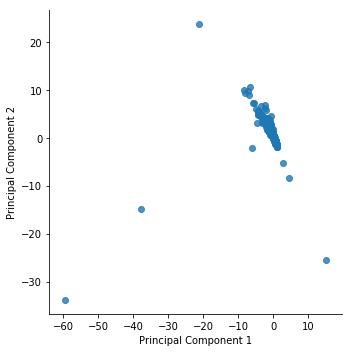

In [51]:
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
ax=sns.lmplot(x='A', y='B',fit_reg=False, data=Y_2d)
ax.set(xlabel="Principal Component 1", ylabel = "Principal Component 2")

# The above plot where the data is collapsed on to the principal components shows that the data might fall into a single big cluster